    1. PREPARATION DES DONNEES

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import joblib
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pf = pd.read_csv('business.retailsales2.csv')

In [4]:
pf

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42


In [5]:
pf.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


In [6]:
pf.describe()

,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,97.138889,9844.926389,-311.493889,-474.958056,9058.474444,1579.391667,10637.941111
std,0.828079,57.458632,4936.386351,362.766989,488.820410,4497.185264,1011.170014,5475.621125
min,2017.000000,54.000000,5720.000000,-2269.510000,-1572.550000,4589.100000,695.420000,5296.530000
25%,2017.000000,68.000000,7059.875000,-300.375000,-867.200000,6428.250000,1083.300000,7633.692500
50%,2018.000000,82.500000,8850.500000,-236.160000,-299.875000,8076.430000,1341.650000,9404.405000
75%,2019.000000,97.500000,10150.700000,-169.487500,-73.277500,9534.000000,1632.132500,11153.687500
max,2019.000000,342.000000,31183.900000,-51.500000,0.000000,27603.210000,5703.250000,33306.460000


In [7]:
pf.columns

Index(['Month', 'Year', 'Total Orders', 'Gross Sales', 'Discounts', 'Returns',
       'Net Sales', 'Shipping', 'Total Sales'],
      dtype='object')

In [8]:
pf.shape

(36, 9)

In [9]:
num_features = pf.select_dtypes(include=['int64', 'float64']).columns
cat_features = pf.select_dtypes(include=['object']).columns

In [10]:
pf.isnull().sum().sort_values(ascending=False)

Month           0
Year            0
Total Orders    0
Gross Sales     0
Discounts       0
Returns         0
Net Sales       0
Shipping        0
Total Sales     0
dtype: int64

In [11]:
for i in num_features:
    print(i)
    pf[i].fillna(pf[i].median(), inplace=True)

Year
Total Orders
Gross Sales
Discounts
Returns
Net Sales
Shipping
Total Sales


In [12]:
for i in cat_features:
    print(i)
    pf[i].fillna('none', inplace=True)

Month


In [13]:
pf.isnull().sum().sort_values(ascending=False)

Month           0
Year            0
Total Orders    0
Gross Sales     0
Discounts       0
Returns         0
Net Sales       0
Shipping        0
Total Sales     0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
scale = LabelEncoder()

In [15]:
for i in cat_features:
    pf[i] = scale.fit_transform(pf[i])

In [16]:
pf.head()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,4,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,3,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,7,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,0,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,8,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


2.ETUDE DES DONNEE DANS UNE GRAPHE OU CAMABERT

In [33]:
import seaborn as sns

pf.describe()

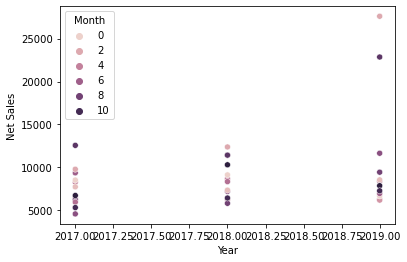

In [42]:
sns.scatterplot(x='Year', y='Net Sales',hue='Month', data=pf)
plt.show()

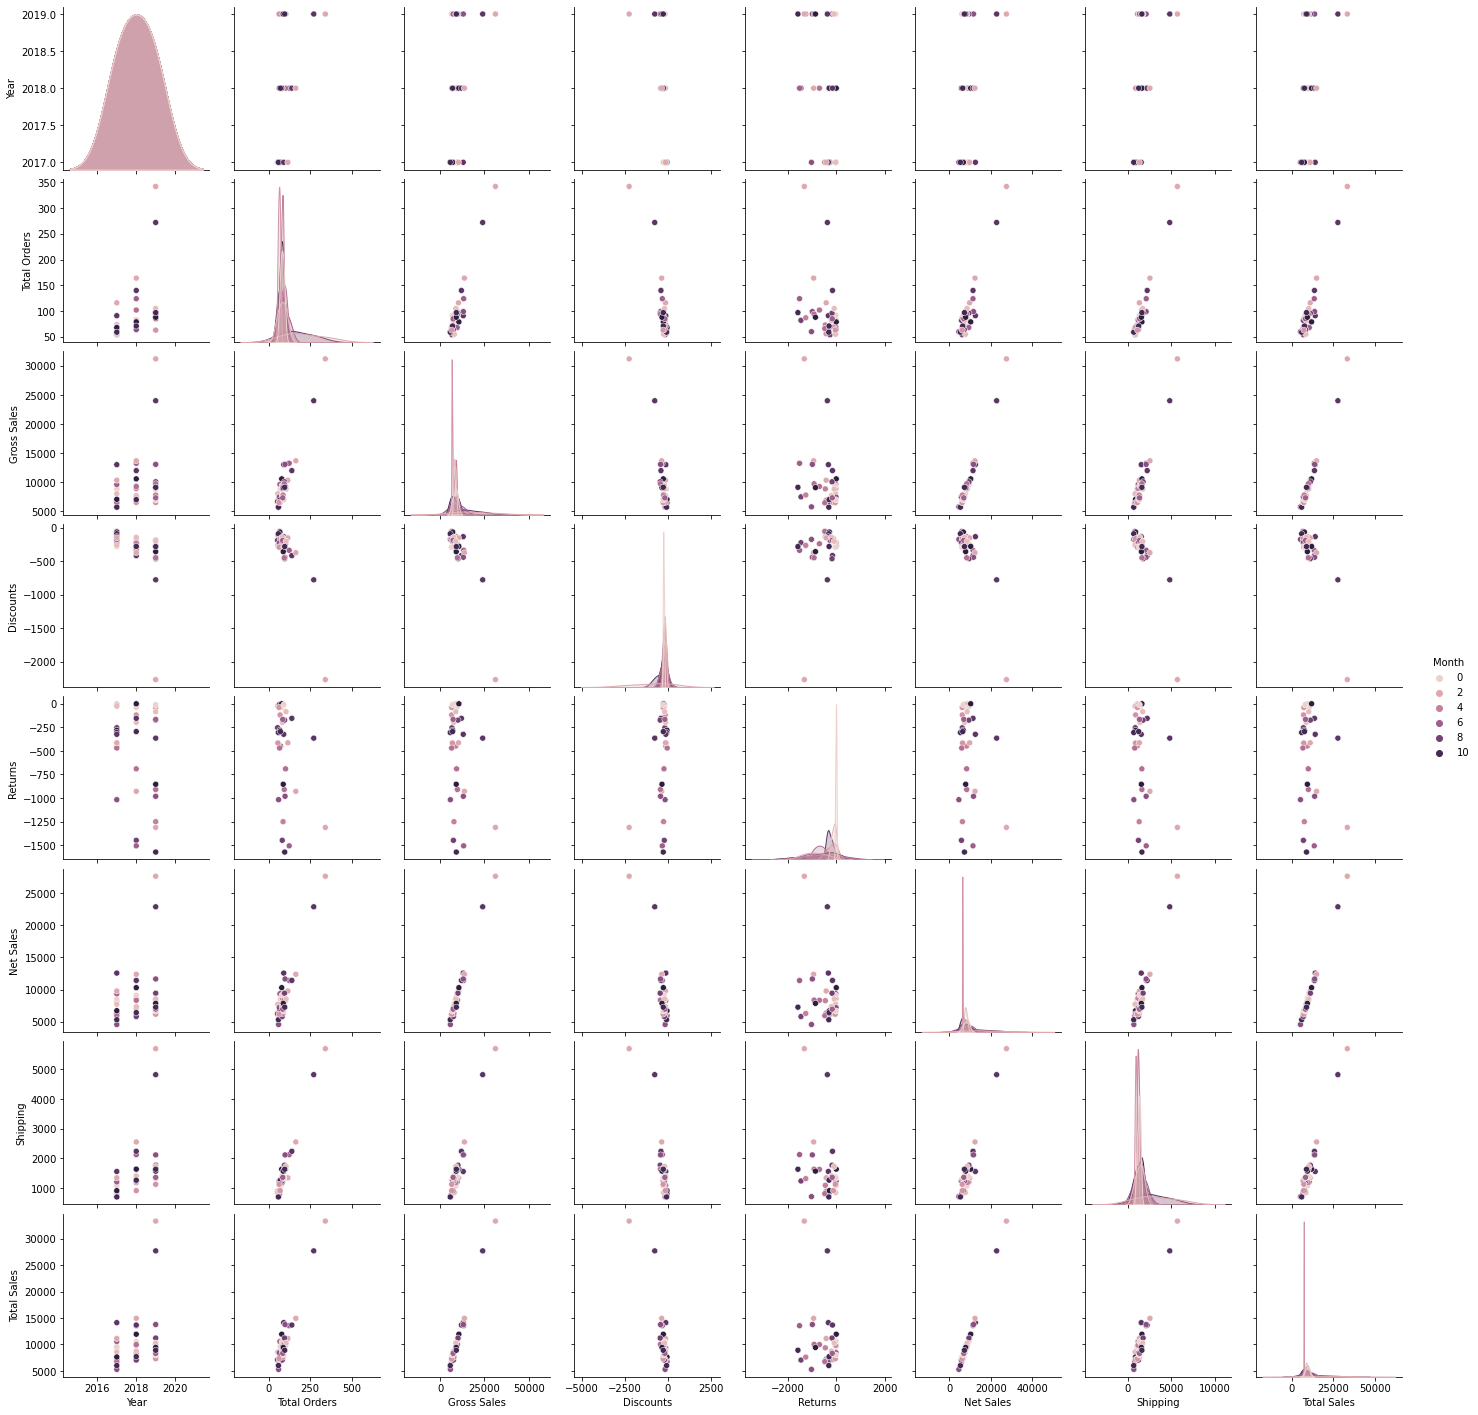

In [43]:
sns.pairplot(pf, hue='Month')
plt.show()

In [46]:
X = pf.drop(columns="Month")

In [47]:
X.head()

,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,2017,73,8861.5,-129.40,-448.45,8283.65,1088.30,9371.95
1,2017,56,6908.5,-104.70,-416.20,6387.60,892.45,7280.05
2,2017,60,5778.5,-172.20,-1017.20,4589.10,707.43,5296.53
3,2017,70,8814.0,-281.40,0.00,8532.60,1068.30,9600.90
4,2017,54,6677.0,-185.75,-253.80,6237.45,866.46,7103.91


In [48]:
y = pf['Month']

In [49]:
y.head()

0    4
1    3
2    7
3    0
4    8
Name: Month, dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
clf = DecisionTreeClassifier()

In [52]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
predict = clf.predict(X_test)

In [54]:
predict

array([ 7,  3,  5,  3,  1,  3, 11,  1])

In [55]:
accuracy = accuracy_score(y_test, predict)

In [57]:
CA = clf.predict([[17, 4, 3, 5, 9, 6, 2, 8]])

In [58]:
CA

array([7])

In [59]:
joblib.dump(clf, 'business_model.joblib')

['business_model.joblib']